# H3 - Univariate Linear Regression

- Student Name:魏侃
- Student ID:2022141460123
- Deadline: 
- Submit to：

In [10]:
# import necessary modules
from matplotlib import pyplot as plt

## data

In [11]:
x=[1.156762,2.624116,2.943006,2.499967,3.530516,4.045524,5.60725,5.784322,7.01605,8.304229,7.351775,8.799763,9.3467,10.232547,11.872116]
y=[3.949326,1.746431,9.902035,5.32671,10.569117,12.493749,14.531507,15.758228,12.235891,12.536069,19.349313,18.347272,18.812099,19.750414,24.672962]

# univariate linear model

$a = w*x + b$

In [12]:
class UniLinearModel:
    def __init__(self, w=0.1, b=0.1):
        self.w, self.b = w, b
    
    def __call__(self, x):
        a = 0.
        a=self.w*x+self.b
        #calculate a by using w and b
        return a
    
    def update(self, w, b):
        self.w, self.b = w, b


## implement Least Squares Approximations

- step1: $\bar{x} = \frac{1}{m}\sum^{m}_{i=1}{x^{i}}$
- step2: $\bar{y} = \frac{1}{m}\sum^{m}_{i=1}{y^{i}}$
- step3: $w = \frac{\sum_{i=1}^{m}{y^{i}*x^{i}} - m \bar{y}* \bar{x}}{\sum_{i=1}^{m}{x^{i}*x^{i}} - m \bar{x}* \bar{x}}$
- step4: $b = \bar{y} - w * \bar{x}$

In [ ]:
def uni_least_square(x, y):
    w, b = 1., 1.
    # step 1: calculate mean of x
    cal_x=0.
    m=0.
    for t in x:
        m+=1
        cal_x+=t
    cal_x=cal_x/m
    # step 2: calculate mean of y
    cal_y=0.
    for t in y:
        cal_y+=t
    cal_y=cal_y/m
    # step 3: calculate w
    count=0
    w_fz=0.
    w_fm=0.
    for i in range(len(x)):
        # step 3.1: calculate the sum of y^{i}*x^{i}
        w_fz+=x[count]*y[count]
        # step 3.2: calculate the sum of square of x^{i}
        w_fm+=x[count]*x[count]
        count+=1
    w_fz-=m*cal_x*cal_y
    w_fm-=m*cal_x*cal_x
    # step 3.3 calculate w
    w=w_fz/w_fm
    # step 4: calculate b 
    b=cal_y-w*cal_x
    return w, b

w, b = uni_least_square(x, y)
print("-"*40)
print("least square method: w={}, b={}".format(w, b))
print("-"*40)

model = UniLinearModel()
model.update(w, b)
a = [model(x_i) for x_i in x]

plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, a, '-')

## implement grad descent algorithm for univariate lienear regression


- step 1: calculate a for each x : $a^{i} = w*x^{i} + b$
- step 2: calculate  $\frac{\partial J}{\partial w} =  \frac{1}{m}\sum_{i=1}^{m}{[(a^{i}-y^{i})*x^{i}}]$
- step 3: calculate  $\frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}{(a^{i}-y^{i})}$
- step 4: update w by:  $w \gets w - \alpha \frac{\partial J}{\partial w}$
- step 5: update b by:  $b \gets b - \alpha \frac{\partial J}{\partial b}$

----------------------------------------
gradient descent method: w=0, b=0
----------------------------------------


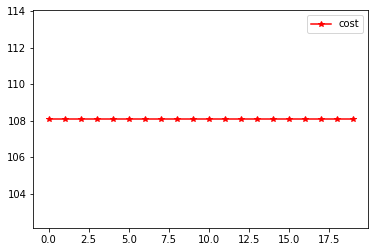

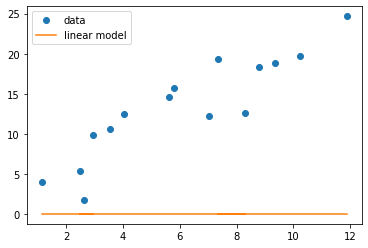

In [14]:
def grad(model, x, y):
    grad_w, grad_b = 0, 0
    # step 1: calculate a for each x : $a^{i} = w*x^{i} + b$
    count=0
    for i in range(len(a)):
        a[count]=w*x[count]+b
        grad_w+=(a[count]-y[count])*x[count]
        grad_b+=(a[count]-y[count])
        count+=1
    m=count
    # step 2: calculate  gradient of J with respect to w
    grad_w=grad_w/m
    # step 3: calculate  gradient of J with respect to b
    grad_b=grad_b/m
    return grad_w, grad_b

def cost(model, x, y):
    J = sum([(model(x_i)-y_i)**2 for x_i, y_i in zip(x, y)])/len(x)/2
    return J
    
model = UniLinearModel()

alpha = 0.01
Js = []

for k in range(20):
    w, b = model.w, model.b
    grad_w, grad_b = grad(model, x, y)
    #################
    ### Your Code Here
    w_next, b_next = 0, 0
    # step 4: update w 
    w=grad_w
    # step 5: update b 
    b=grad_b
    #step3: update linear model
    model.update(w_next, b_next)
    #################
    Js.append(cost(model, x, y))


plt.plot(Js,'r-*',label="cost")
plt.legend()
print("-"*40)
print("gradient descent method: w={}, b={}".format(w, b))
print("-"*40)    
    
a = [model(x_i) for x_i in x]

plt.figure()
plt.plot(x, y, 'o', label="data")
plt.plot(x, a, '-', label="linear model")
plt.legend()